Upploading our UserName and API key of Kaggle to Google Colab

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"mohamedmeerasham","key":"ffc608730739435bb486e5d7b1aa2ff0"}'}

Giving shell commands to google collab to handle the creation of file and security of the dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

installing kaggle

In [ ]:
!pip install kaggle

importing the dataset "redwankarimsony/heart-disease-data" from Kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 40.4MB/s]


importing the dataset using pandas

In [ ]:
import pandas as pd
df = pd.read_csv("/content/heart-disease/heart_disease_uci.csv")

Dropping the id column which is unnecessary for the prediction

In [ ]:
df=df.drop("id",axis=1)

seperating the numeric columns and filling the null numeric values as mean

In [ ]:
numeric_cols=df.select_dtypes(include="number").columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

importing matplotlib and seaborn inorder to visualize our numerical data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

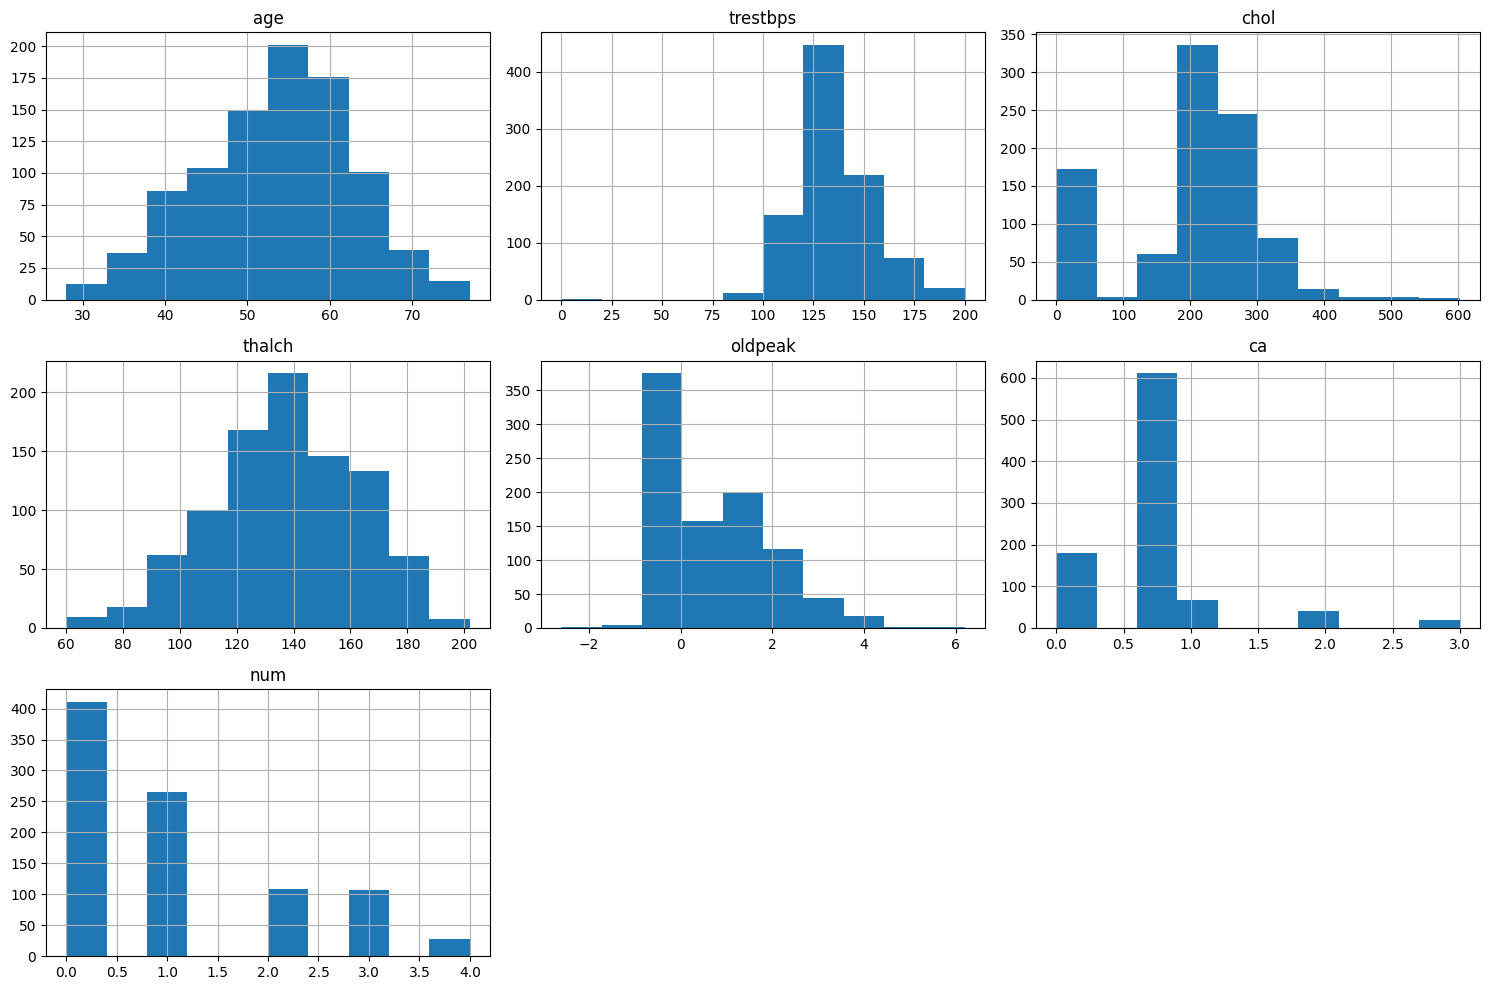

In [ ]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

visualizing the correlation of our different numeric columns

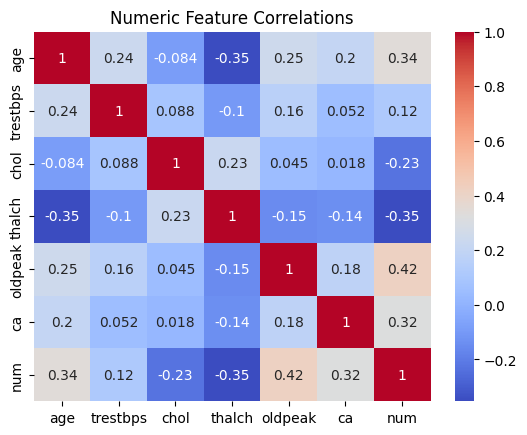

In [ ]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap="coolwarm")
plt.title("Numeric Feature Correlations")
plt.show()

seperating the catagories which are not numeric and removing the target data

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('nums')

seperating the target data and the data required for prediction

In [ ]:
data_for_prediction=df.drop('num',axis=1)
target=(df['num']>0).astype(int)

one-hot encoding on the categorical columns listed in cat_cols

In [ ]:
X=pd.get_dummies(data_for_prediction,columns=cat_cols)

importing the Train test split modeling normalization and model evaluation from sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

split the training data and testing data in ratio 4:1

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=42)

Scaling the data using StandardScalar

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

importing RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

Evaluating the model

In [ ]:
y_pred_lr=rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_lr))

Random Forest Accuracy: 0.842391304347826


importing confusion matric to find where the model is wrong

In [ ]:
from sklearn.metrics import confusion_matrix

visulizing the confusion matrix

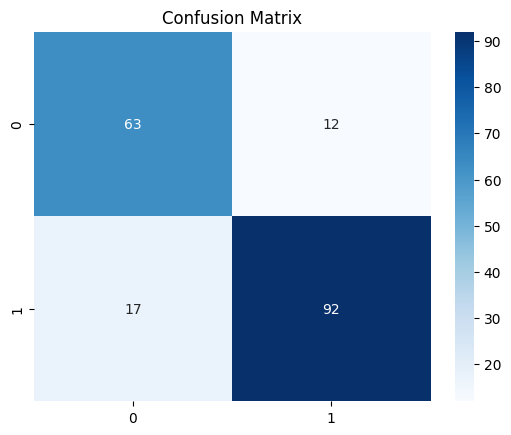

In [ ]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

visualizing how other catagories affect the persons heart disease chances

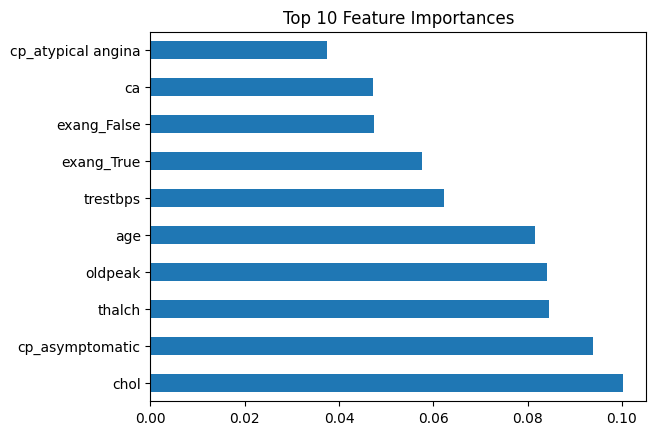

In [ ]:
feat_imp=pd.Series(rf_model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.show()

importing the joblib inorder to save the model and use it for later use

In [ ]:
import joblib


saving the model

In [ ]:
joblib.dump(rf_model,"heart_rf_model.pkl")

['heart_rf_model.pkl']

saving the scaled data

In [ ]:
joblib.dump(scaler,"heart_scaler.pkl")

['heart_scaler.pkl']

creating a sample data template which we require the user

In [ ]:
sample=X.head(1)
sample.to_csv("heart_user_template.csv",index=False)

importing sample dataset

In [ ]:
from google.colab import files
files.upload()

Saving Sample_dataset.csv to Sample_dataset (2).csv


{'Sample_dataset (2).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

converting users input into proper format

In [ ]:
user_input=pd.read_csv("Sample_dataset.csv")
numeric_cols=df.select_dtypes(include="number").columns.tolist()
cat_cols=df.select_dtypes(include="object").columns.tolist()
bool_cols=df.select_dtypes(include="bool").columns.tolist()

numeric_cols=[col for col in numeric_cols if col in user_input.columns]
cat_cols=[col for col in cat_cols if col in user_input.columns]
bool_cols=[col for col in bool_cols if col in user_input.columns]


cleaning the users input

In [ ]:
user_input[numeric_cols]=user_input[numeric_cols].fillna(user_input[numeric_cols].mean())
for col in cat_cols:
  user_input[col]=user_input[col].fillna("unknown")
for col in bool_cols:
  user_input[col]=user_input[col].astype(int)

convert users input into one hot encoding

In [ ]:
user_input_encoded=pd.get_dummies(user_input,columns=cat_cols)

converting the user encoded data index as same as the index with which we trained out model

In [ ]:
user_input_encoded=user_input_encoded.reindex(columns=X.columns,fill_value=0)

loading out scaler data to transform the users input to scalered form

In [ ]:
scaler=joblib.load("heart_scaler.pkl")
user_input_scaled=scaler.transform(user_input_encoded)

loading out model using joblib and using it the predict the users input

In [ ]:
model=joblib.load("heart_rf_model.pkl")
prediction=model.predict(user_input_scaled)
user_input["Heart Disease Prediction"]=prediction

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

displaying the predicted data according to the users input

In [ ]:
print(user_input)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           